# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [ ]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()


Download complete
Extracting data files...
Data extracted


**Q1.** This question provides some practice cleaning variables which have common problems.

1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("airbnb_NYC.csv", encoding="cp1252")

data["Price"] = data["Price"].str.replace(",", "") #Values > 999 contain unnecessary commas
data["Price"] = data["Price"].astype(int) #Price should be stored as an number (int) rather than as an object (str)

print(data["Price"].isna().sum()) #Zero missing values for this column

0


2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.

In [ ]:
data = pd.read_csv("mn_police_use_of_force.csv")

data["subject_injury"].value_counts(dropna=False)

proportion = data["subject_injury"].isna().mean()
print(proportion * 100)

76.19342359767892


In [ ]:
pd.crosstab(
    data["force_type"],
    data["subject_injury"],
    dropna=False
)

subject_injury,No,Yes,NaN
force_type,,,
Baton,0,2,2
Bodily Force,1093,1286,7051
Chemical Irritant,131,41,1421
Firearm,2,0,0
Gun Point Display,33,44,27
Improvised Weapon,34,40,74
Less Lethal,0,0,87
Less Lethal Projectile,1,2,0
Maximal Restraint Technique,0,0,170


About 76% of the subject_injury values aren’t recorded. Looking at the cross-tabulation, this isn’t spread evenly across force types. Bodily force, chemical irritants, and taser incidents are much more likely to lack injury information, while firearm incidents almost always have it recorded.

In [ ]:
data["subject_injury_clean"] = data["subject_injury"].fillna("Missing")
data["subject_injury_clean"].value_counts()

,count
subject_injury_clean,
Missing,9848
Yes,1631
No,1446


3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.

In [ ]:
data = pd.read_csv("metabric.csv")

data['binary_overall_survival_status'] = (
    data['Overall Survival Status']
    .str.replace(":LIVING", "")
    .str.replace(":DECEASED", "")
    .astype(int)
)
#data['binary_overall_survival_status'].value_counts(dropna=False)

,count
binary_overall_survival_status,
1,768
0,575


4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [ ]:
data = pd.read_csv("airbnb_NYC.csv", encoding="cp1252")

print(data["Review Scores Rating"].isna().sum())

8323


In [ ]:
median_score = data["Review Scores Rating"].median()
data["Review Scores Rating Imputed"] = (data["Review Scores Rating"].fillna(median_score))
#data.head()

Median imputation assumes that listings with missing review scores are average, which may not be true if missing values come from new or lower-quality listings. This can bias results and reduce variability in the data.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.


1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?

In [ ]:
import pandas as pd

data = pd.read_csv("shark_attacks.csv") #I converted it from a xls to a csv
data.head()

/tmp/ipython-input-365427678.py:3: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("shark_attacks.csv") #I converted it from a xls to a csv


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Drop any columns that do not contain data.

In [ ]:
#data.isna().sum()
#list(data.columns)

In [ ]:
data = data.iloc[:, :21]
data.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,N,1100hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#data.isna().sum().sort_values(ascending=False)

3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.

An observation is a single recorded shark attack. Each row in the dataset represents one attack, so cleaning focuses on removing empty or irrelevant columns while keeping each row as an independent event.

4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

In [ ]:
#data["Year"].dtype
#data["Year"].value_counts() # Values range from 0-2026

In [ ]:
data = data.dropna(subset=["Year"])
data["Year"] = data["Year"].astype(int)
data = data[data["Year"] >= 1940]
#data["Year"]

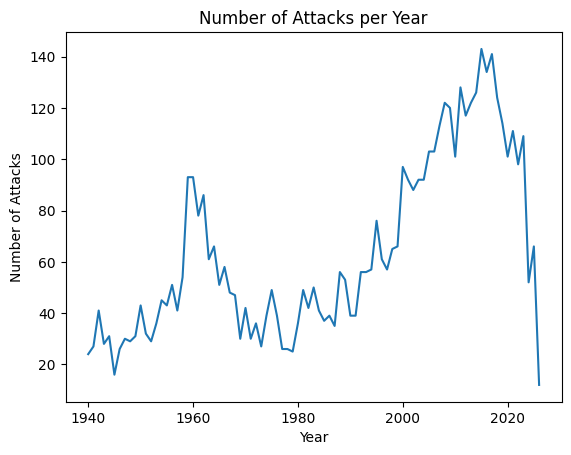

In [ ]:
import matplotlib.pyplot as plt

year_counts = data["Year"].value_counts().sort_index()  # sort_index() ensures years are in order

plt.plot(year_counts.index, year_counts.values)
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Number of Attacks per Year")
plt.show()


Reported attacks appear to be decreasing from 2015 to the present. The line plot shows that the number of attacks has fluctuated over time rather than remaining constant.

5. Clean the Age variable and make a histogram of the ages of the victims.

In [ ]:
data["Age"].unique()

array(['13', '?', '39', '11', '27', '12', '26', '56', '55', '24', '25',
       '61', '40', '14', '50+', '54', '48', '57', '8', '63', '9', '19',
       '7', '85', '69', '18', '66', '21', '37', '16', '20', '42', '45',
       '30', '30+', '40+', '29', '35', '58', '17', '36', '23', '28',
       '60+', '38', '68', '33', '15', '41', '43', 'Middle age', '49',
       '46', '65', '64', nan, '32', '10', '62', '22', '52', '44', '47',
       '59', '50', '34', '30s', '20/30', '20s', '77', '60', '!2', '73',
       '50s', '67', '6', '53', '51', '31', '40s', 'teen', 'Teen', 'M',
       '!6', '!!', '71', '75', '45 and 15', '70', '4', '28 & 22',
       '22, 57, 31', '60s', "20's", '74', '9 & 60', 'a minor', '3', '82',
       '40?', '72', '18 months', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's

In [ ]:
# This code block is designed to create seperate rows for values like '9 & 12' and '22, 57, 31'.
# As you can see, taking the average for those values wouldn't make sense and
# neither would dropping them altogether.

import pandas as pd
import numpy as np

rows = []

for index, row in data.iterrows():
    age = str(row['Age'])
    age = age.replace('&', ',') # standardize separators so we only have to split once

    if ',' in age:
        parts = age.split(',')
        for p in parts:
            new_row = row.copy()
            new_row['Age'] = p.strip()
            rows.append(new_row)
    else:
        rows.append(row)

data_expanded = pd.DataFrame(rows)


In [ ]:
# I decided to make a function that covers all of the bases

def clean_age(x):
    if pd.isna(x): # store null values as NaN
        return np.nan

    x = str(x).lower().strip()

    if 'month' in x:
        return 0 # treat infants as age 0

    non_num = ['adult','young','middle age','middle-age','elderly','minor','teen','teens']
    if any(word in x for word in non_num):
        return np.nan # store non numeric values as Nan

    x = x.replace('?', '').replace('+', '')
    x = x.replace('½', '')  # handles 6½
    for ch in ['!', '>', '"', '(', ')']:
        x = x.replace(ch, '') # remove common junk characters

    x = x.replace("'s", '').replace('s', '') # remove "40s" / "20's"

    if 'mid' in x:
        for decade in ['20','30','40','50','60']:
            if decade in x:
                return int(decade) + 5 # handle mid-30s / mid-20s

    x = x.replace('/', ' to ').replace(' or ', ' to ')
    parts = x.split()
    numbers = []
    for p in parts:
        if p.isdigit():
            numbers.append(int(p))
    if not numbers:
        return np.nan
    if 'to' in x and len(numbers) == 2:
        return int(round((numbers[0] + numbers[1]) / 2)) # average values within age range

    return numbers[0]

In [ ]:
data_expanded['Age_clean'] = (data_expanded['Age'].apply(clean_age).astype('Int64'))
data_expanded['Age_clean'].unique()

<IntegerArray>
[  13, <NA>,   39,   11,   27,   12,   26,   56,   55,   24,   25,   61,   40,
   14,   50,   54,   48,   57,    8,   63,    9,   19,    7,   85,   69,   18,
   66,   21,   37,   16,   20,   42,   45,   30,   29,   35,   58,   17,   36,
   23,   28,   60,   38,   68,   33,   15,   41,   43,   49,   46,   65,   64,
   32,   10,   62,   22,   52,   44,   47,   59,   34,   77,    2,   73,   67,
    6,   53,   51,   31,   71,   75,   70,    4,   74,    3,   82,   72,    0,
    5,   86,   84,   87,    1,   81,   78]
Length: 85, dtype: Int64

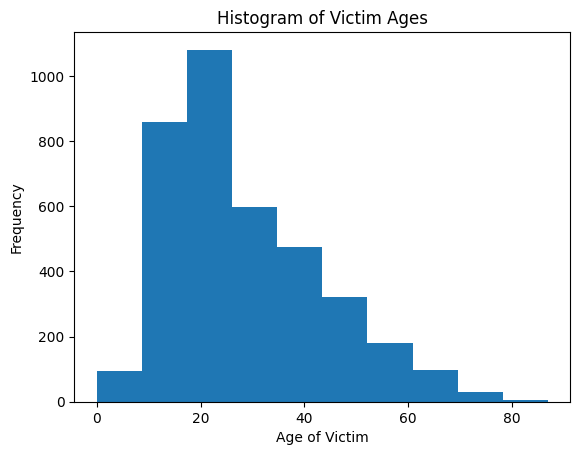

In [ ]:
import matplotlib.pyplot as plt

ages = data_expanded['Age_clean'].dropna()

plt.hist(ages)
plt.xlabel("Age of Victim")
plt.ylabel("Frequency")
plt.title("Histogram of Victim Ages")

plt.show()

6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

In [ ]:
#data["Type"].unique()

type_map = {
    'Provoked': 'Provoked',
    'Unprovoked': 'Unprovoked',

    'Questionable': 'Unknown',
    '?': 'Unknown',
    'Unconfirmed': 'Unknown',
    'Unverified': 'Unknown',
    'Invalid': 'Unknown',
    'Under Investigation': 'Unknown',
    'Watercraft': 'Unknown',
    'Boat': 'Unknown',
    'Sea Disaster': 'Unknown'
}

data['Type'] = (
    data['Type']
    .map(type_map)
    .fillna('Unknown')
)

7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.

In [ ]:
#data["Fatal Y/N"].unique()

In [ ]:
y_n_map = {
    'Y': 'Y',
    'Y x 2': 'Y',
    'N': 'N',
    'n': 'N',
    'F': 'Unknown',
    'M': 'Unknown',
    'Nq': 'Unknown',
    'UNKNOWN': 'Unknown',
    '2017': 'Unknown'
}

data['Fatal Y/N'] = (
    data['Fatal Y/N']
    .map(y_n_map)
    .fillna('Unknown')
)

8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [ ]:
# Given an attack is provoked, how likely is it to be fatal?
# Given an attack is unprovoked, how likely is it to be fatal?

subset = data[(data['Type'].isin(['Provoked', 'Unprovoked'])) & (data['Fatal Y/N'].isin(['Y', 'N']))]
unprovoked_rate = (subset[subset['Type'] == 'Unprovoked']['Fatal Y/N'].eq('Y').mean())
provoked_rate = (subset[subset['Type'] == 'Provoked']['Fatal Y/N'].eq('Y').mean())

print(f"The unprovoked fatality rate is: ", unprovoked_rate)
print(f"The provoked fatality rate is: ", provoked_rate)

# Unprovoked attacks have a higher fatality rate than provoked attacks.

The unprovoked fatality rate is:  0.1706417506761741
The provoked fatality rate is:  0.023529411764705882


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?

The paper explains what “tidy data” is, why it matters, and how having data in a tidy format makes data analysis easier, more efficient, and less error-prone. Wickham introduces a standard structure for datasets and shows how messy data causes unnecessary complexity in analysis and visualization. The paper also connects tidy data to tools in R (especially the tidyverse) and demonstrates how tidying is a key step in the data analysis workflow.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

The tidy data standard is meant to:
- Provide a consistent way to organize data
- Make datasets easier to manipulate, model, and visualize
- Reduce the cognitive load on analysts by minimizing special cases
- Enable tools to work together seamlessly

In short: tidy data lets you spend time analyzing data instead of fighting its structure.

3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

`“Like families, tidy datasets are all alike but every messy dataset is messy in its own way.”`
This means that tidy datasets follow the same structural rules. Messy datasets can be messy in many different, inconsistent ways. So once data is tidy, it looks familiar; when it’s messy, every dataset presents a new problem.

`“For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general.”`

This means that in practice, you can usually tell what the dataset represents. But giving a universal definition of “variable” and “observation” that works for all datasets is hard. That’s why Wickham focuses on practical rules, not philosophical ones

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

Wickham defines:

Value: A single measurement (a number, string, or category)

Variable: A quantity measured across multiple observations

Observation: All values measured on a single unit (row)

 5. How is "Tidy Data" defined in section 2.3?

A dataset is tidy if:
1. Each variable has its own column
2. Each observation has its own row
3. Each value has its own cell

This is the core definition used throughout the paper.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

The 5 most common problems:
1. Column headers are values, not variable names
2. Multiple variables stored in one column
3. Variables stored in both rows and columns
5. Multiple observational units in the same table
6. One observational unit stored across multiple tables

Table 4 is messy because:

Column names represent values (e.g., years or cases). The data needs to be reshaped so those values become rows. This violates the rule “each variable gets its own column”

Melting = turning column names into data.

7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 is messy because:
1. It stores multiple variables (e.g., sex, case type) in column names
2. Values are encoded in structure instead of data

Table 12 is tidy and molten because:
1. Column names are variables, not values
2. Each row is a single observation
3. Each cell holds exactly one value
4. The dataset has been reshaped into long (molten) form

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.

In [ ]:
import pandas as pd

data = pd.read_csv("ForeignGifts_edu.csv")
data.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.

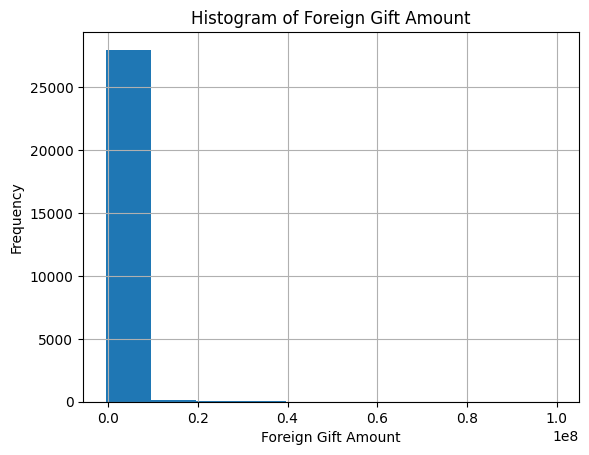

In [ ]:
data["Foreign Gift Amount"].hist()
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency")
plt.title("Histogram of Foreign Gift Amount")
plt.show()

The distribution of foreign gift amounts is highly right-skewed. Most gifts are relatively small and occur at common rounded values such as $50, $100, and $1,000, while a small number of extremely large gifts create a long right tail. These large outliers dominate the scale of the histogram, making a standard linear-scale histogram difficult to interpret.

3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

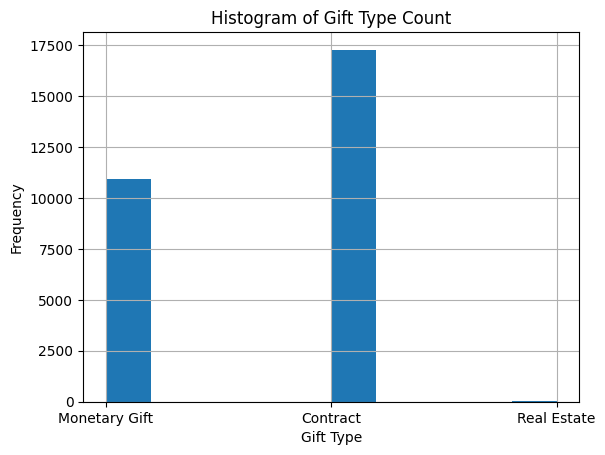

In [ ]:
data["Gift Type"].hist()
plt.xlabel("Gift Type")
plt.ylabel("Frequency")
plt.title("Histogram of Gift Type Count")
plt.show()

In [ ]:
contracts_proportion = (data['Gift Type'] == 'Contract').mean()
monetary_proportion = (data['Gift Type'] == 'Monetary Gift').mean()
real_estate_proportion = (data['Gift Type'] == 'Real Estate').mean()

print("Proportion of contract gift types:", contracts_proportion)
print("Proportion of monetary gift types:", monetary_proportion)
print("Proportion of real estate gift types:", real_estate_proportion)

Proportion of contract gift types: 0.6120973742957372
Proportion of monetary gift types: 0.3875128450444704
Proportion of real estate gift types: 0.00038978065979235324


4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

In [ ]:
top_country_giftor = (data['Country of Giftor'].value_counts().head(15))
top_country_giftor

,count
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [ ]:
top_amount_given = (data.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15))
top_amount_given

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.

In [ ]:
top_amount_received = (data.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15))
top_amount_received


,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


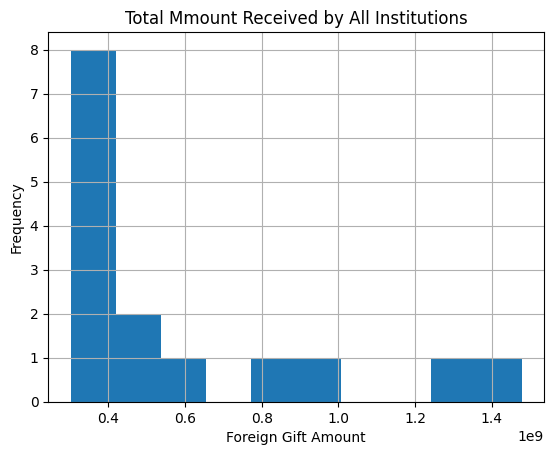

In [ ]:
top_amount_received.hist()
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency")
plt.title("Total Mmount Received by All Institutions")
plt.show()

6. Which giftors provide the most money, in total?

In [ ]:
giftor_total = data.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
giftor_total

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)


1. Load the `college_completion.csv` data with Pandas.

In [ ]:
import pandas as pd

data = pd.read_csv("college_completion.csv")
data.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.

In [ ]:
data.shape
# 3798 observations and 63 variables

(3798, 63)

3. Cross tabulate `control` and `level`. Describe the patterns you see in words.

In [ ]:
pd.crosstab(data['control'], data['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Institutional level varies strongly by control. Public institutions are disproportionately represented among 2-year schools, while private not-for-profit institutions are almost exclusively 4-year. Private for-profit institutions fall between these two extremes, with a relatively balanced distribution across levels.

4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?

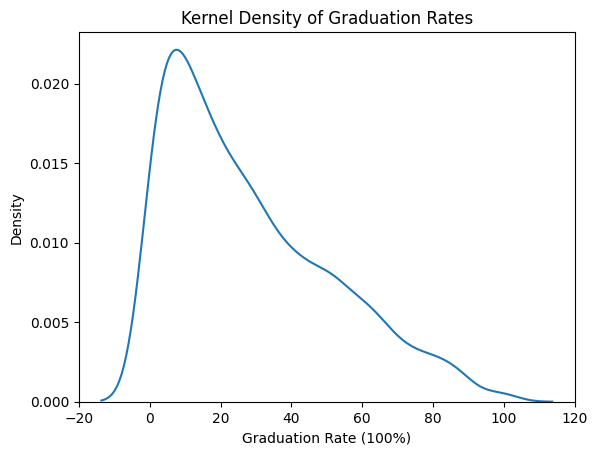

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=data, x='grad_100_value')

plt.xlabel('Graduation Rate (100%)')
plt.title('Kernel Density of Graduation Rates')
plt.show()


In [ ]:
data['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


Graduation rates vary widely across institutions. The distribution shows substantial spread, with most institutions clustered in the middle range, and fewer institutions achieving very high graduation rates.

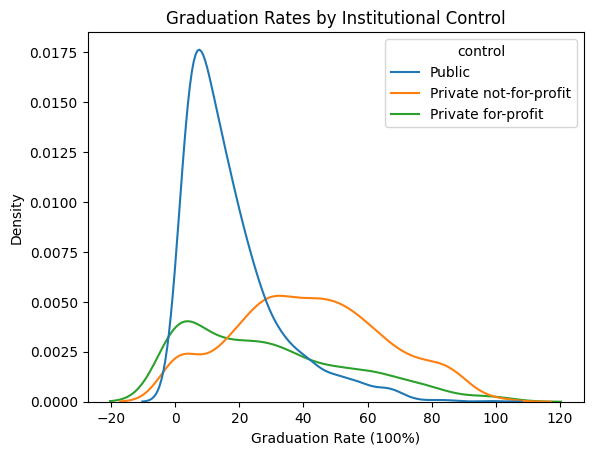

In [ ]:
sns.kdeplot(data=data, x='grad_100_value', hue='control')

plt.xlabel('Graduation Rate (100%)')
plt.title('Graduation Rates by Institutional Control')
plt.show()


In [ ]:
data.groupby('control')['grad_100_value'].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


Graduation rates differ noticeably by institutional control. Private not-for-profit institutions tend to have the most favorable graduation outcomes, with higher median graduation rates and a distribution shifted toward higher values.

5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

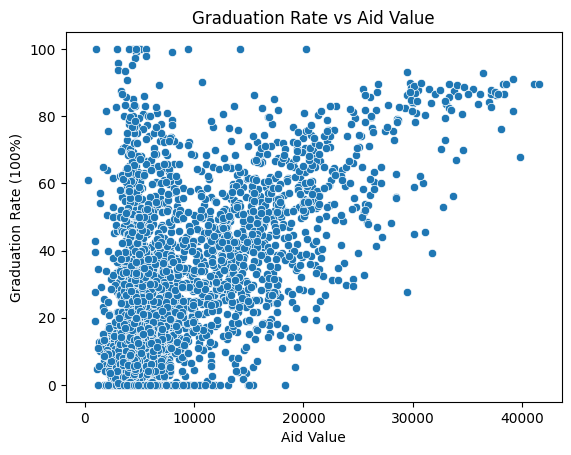

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=data, x='aid_value', y='grad_100_value')

plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (100%)')
plt.title('Graduation Rate vs Aid Value')
plt.show()


In [ ]:
cov = data[['aid_value', 'grad_100_value']].cov()
cov

,aid_value,grad_100_value
aid_value,4.121201e+07,88610.483169
grad_100_value,8.861048e+04,543.483382


In [ ]:
corr = data[['aid_value', 'grad_100_value']].corr()
corr

,aid_value,grad_100_value
aid_value,1.000000,0.575879
grad_100_value,0.575879,1.000000


The scatterplot shows a moderate positive association between aid value and graduation rates. Institutions that offer higher levels of aid tend to have higher graduation rates, although there is substantial variation, particularly at lower aid levels. The positive covariance and a correlation of approximately 0.58 confirm this upward relationship.

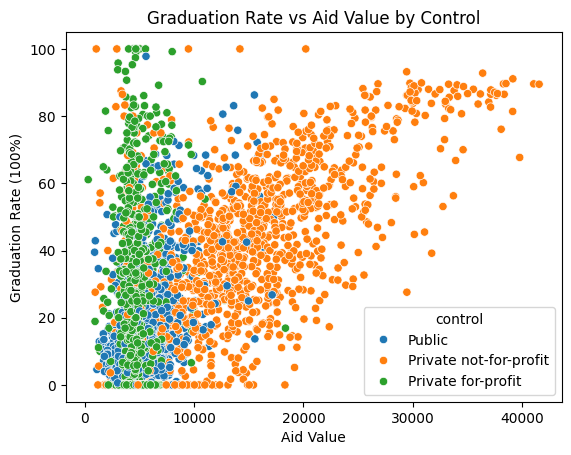

In [ ]:
sns.scatterplot(data=data, x='aid_value', y='grad_100_value', hue='control')

plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (100%)')
plt.title('Graduation Rate vs Aid Value by Control')
plt.show()


In [ ]:
data.groupby('control')[['aid_value', 'grad_100_value']].cov()

aid_value  grad_100_value
control                                                            
Private for-profit     aid_value       1.957540e+06     6897.524957
                       grad_100_value  6.897525e+03      655.446387
Private not-for-profit aid_value       6.041488e+07   109274.123337
                       grad_100_value  1.092741e+05      554.660462
Public                 aid_value       4.564360e+06    15355.146212
                       grad_100_value  1.535515e+04      216.956489

In [ ]:
data.groupby('control')[['aid_value', 'grad_100_value']].corr()

aid_value  grad_100_value
control                                                         
Private for-profit     aid_value        1.000000        0.188363
                       grad_100_value   0.188363        1.000000
Private not-for-profit aid_value        1.000000        0.601591
                       grad_100_value   0.601591        1.000000
Public                 aid_value        1.000000        0.482481
                       grad_100_value   0.482481        1.000000

The relationship between aid value and graduation rates varies by institutional control. Private not-for-profit institutions exhibit the strongest positive association, with a correlation of approximately 0.60, indicating that higher aid levels are associated with higher graduation rates. Public institutions show a moderate positive relationship, while private for-profit institutions display only a weak association between aid and graduation outcomes. Overall, aid appears to be most strongly related to graduation success at private not-for-profit institutions.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)


1. Load the `ames_prices.csv` data with Pandas.

In [ ]:
import pandas as pd

data = pd.read_csv("ames_prices.csv")
data.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?

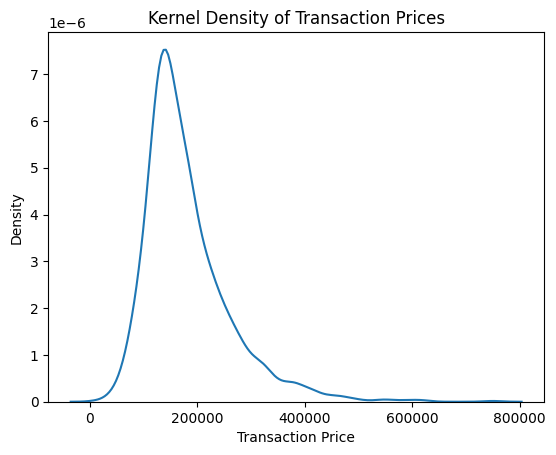

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=data, x='price')

plt.xlabel('Transaction Price')
plt.title('Kernel Density of Transaction Prices')
plt.show()


In [ ]:
data['price'].describe()

,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


Transaction prices are highly right-skewed, with most sales clustered in the lower price range and a small number of very expensive transactions creating a long right tail.

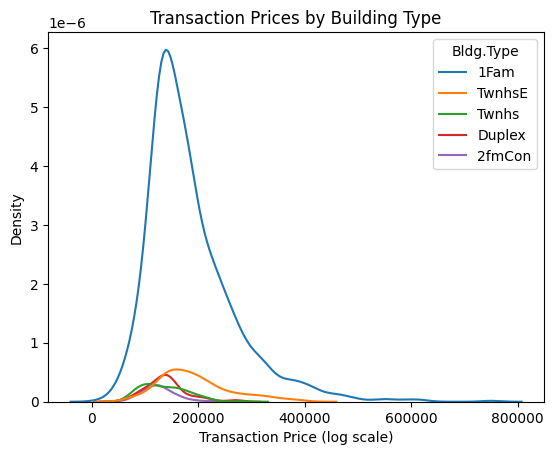

In [ ]:
sns.kdeplot(data=data, x='price', hue='Bldg.Type')

plt.xlabel('Transaction Price (log scale)')
plt.title('Transaction Prices by Building Type')
plt.show()


In [ ]:
price_by_type = (data.groupby('Bldg.Type')['price'].describe())
price_by_type


,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


Townhouse End Units (TwnhsE) are the most expensive on average, followed closely by Single-Family homes (1Fam). Single-Family homes (1Fam) have the highest variability in transaction prices, followed by Townhouse End Units (TwnhsE).

3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).

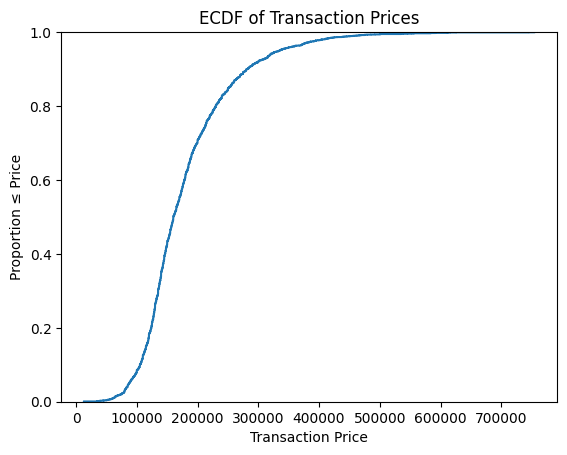

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.ecdfplot(data=data, x='price')

plt.xlabel('Transaction Price')
plt.ylabel('Proportion ≤ Price')
plt.title('ECDF of Transaction Prices')
plt.show()

In [ ]:
five_num = data['price'].quantile([0, 0.25, 0.5, 0.75, 1])
five_num

,price
0.00,12789.0
0.25,129500.0
0.50,160000.0
0.75,213500.0
1.00,755000.0


4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?

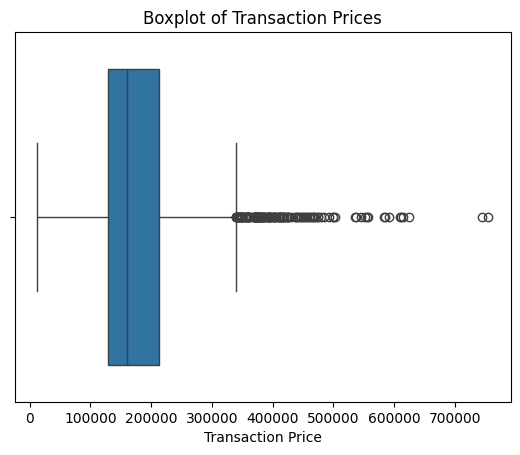

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['price'])

plt.xlabel('Transaction Price')
plt.title('Boxplot of Transaction Prices')
plt.show()

The boxplot shows a large number of outliers on the upper end of the distribution, indicating that while most transaction prices fall within a relatively narrow range, a small number of very expensive properties exist.

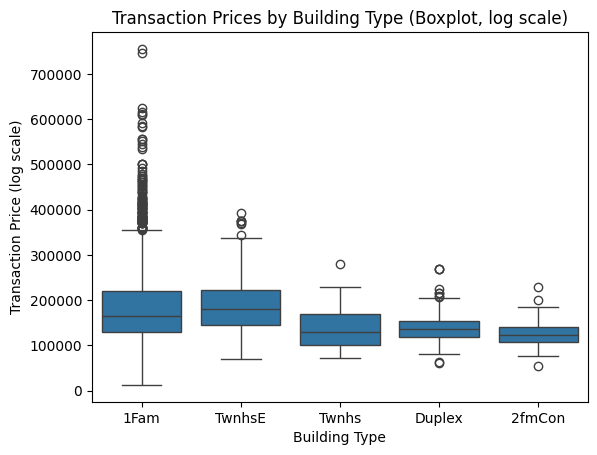

In [ ]:
sns.boxplot(data=data, x='Bldg.Type', y='price')

plt.xlabel('Building Type')
plt.ylabel('Transaction Price (log scale)')
plt.title('Transaction Prices by Building Type (Boxplot, log scale)')
plt.show()

Transaction prices vary substantially by building type. Townhouse end units and single-family homes have the highest median prices, with townhouse end units being the most expensive on average. Single-family homes exhibit the greatest price variability and the most extreme high-price outliers, reflecting a wide range of property characteristics. In contrast, two-family conversions have the lowest median prices and the least variability.

5. Make a dummy variable indicating that an observation is an outlier.

In [ ]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['price_outlier'] = (data['price'] < lower_bound) | (data['price'] > upper_bound)
data['price_outlier'].value_counts()

,count
price_outlier,
False,2793
True,137


6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [ ]:
lower = data['price'].quantile(0.01)
upper = data['price'].quantile(0.99)

data['price_winsor'] = data['price'].clip(lower=lower, upper=upper)

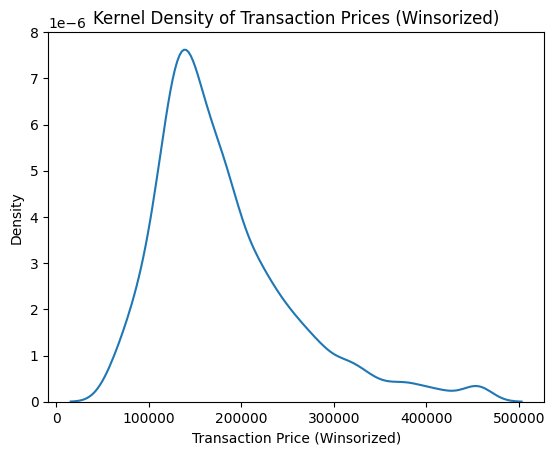

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=data, x='price_winsor')

plt.xlabel('Transaction Price (Winsorized)')
plt.title('Kernel Density of Transaction Prices (Winsorized)')
plt.show()

The winsorized kernel density plot is very similar to the original, particularly in the central region of the distribution. The primary difference is a shorter and smoother right tail, reflecting the capping of extreme high-price transactions. This indicates that outliers primarily influence the tails of the distribution rather than the typical transaction prices.